# G2M Case Study
## Data Glacier Virtual Internship
### May 12, 2024

### Overview 
XYZ is a private firm in US. Due to remarkable growth in the taxi and cab industry in last few years and multiple key players in the market, it is planning for an investment in cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Objective 
Perform exploratory data analysis (EDA) on the given data set. Provide 5-7 hypotheses to test with data-driven results. Provide recommendations to the company after analysis.

### Data

The data provided was collected between January 31, 2016 to December 31, 2018. 

### Set Up
We need to download and read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs for the files
cab_data_url = "https://raw.githubusercontent.com/paulsoriiiano/G2M-Case-Study/main/data/Cab_Data.csv"
customer_url = "https://raw.githubusercontent.com/paulsoriiiano/G2M-Case-Study/main/data/Customer_ID.csv"
transaction_url = "https://raw.githubusercontent.com/paulsoriiiano/G2M-Case-Study/main/data/Transaction_ID.csv"
city_url = "https://raw.githubusercontent.com/paulsoriiiano/G2M-Case-Study/main/data/City.csv" 

# Read .csv files into a dataframe
cabs = pd.read_csv(cab_data_url)
customers = pd.read_csv(customer_url)
transactions = pd.read_csv(transaction_url)
cities = pd.read_csv(city_url) 

### I. Investigate the dataframe descriptions

In [2]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [5]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [6]:
cities['Users'] = cities['Users'].apply(lambda x: x.replace(',', ''))

In [7]:
cities['Population'] = cities['Population'].apply(lambda x: x.replace(',', ''))

In [8]:
cities.Users = pd.to_numeric(cities.Users)

In [9]:
cities.Population = pd.to_numeric(cities.Population)

In [10]:
cities.head(5)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [11]:
cabs.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [12]:
transactions.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
customers.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### II. Check for duplicated data

In [14]:
cabs[cabs.duplicated(keep=False)]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [15]:
transactions[transactions.duplicated(keep=False)]

,Transaction ID,Customer ID,Payment_Mode


In [16]:
customers[customers.duplicated(keep=False)]

,Customer ID,Gender,Age,Income (USD/Month)


In [17]:
cities[cities.duplicated(keep=False)]

,City,Population,Users


### III. Exploring data

#### Creating the master data

In [18]:
demographic = pd.merge(left=transactions, right=customers, on='Customer ID')
demographic.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [19]:
transaction_details = pd.merge(left=cabs, right=demographic, on='Transaction ID')
transaction_details.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [20]:
masterdata = pd.merge(left=transaction_details, right=cities, on='City')
masterdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


In [21]:
len(masterdata)

359392

***
### Hypothesis 1: Which cities were the most successful?

In [22]:
cabs_with_profit = masterdata.copy()
cabs_with_profit['Profit'] = cabs_with_profit['Price Charged'] - cabs_with_profit['Cost of Trip']
cabs_with_profit.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844


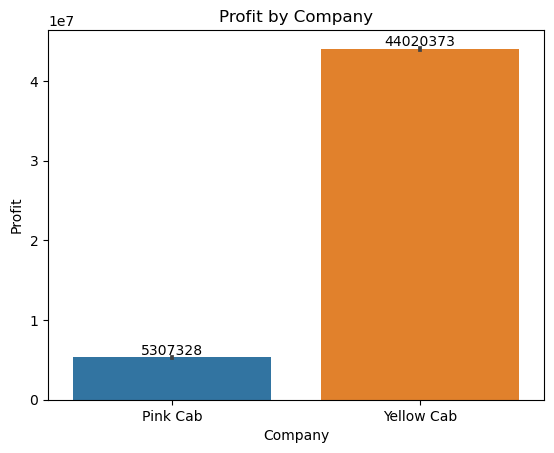

In [64]:
by_profits=sns.barplot(y='Profit', x='Company', data=cabs_with_profit, estimator='sum')
by_profits.set(title='Profit by Company')

for i in by_profits.containers:
    by_profits.bar_label(i, fmt='%d')
plt.savefig('cab_profits.png')

In [24]:
cabs.groupby('City')['Transaction ID'].count().sort_values(ascending=False)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction ID, dtype: int64

[Text(0.5, 0, 'Number of Rides'), Text(0, 0.5, 'City')]

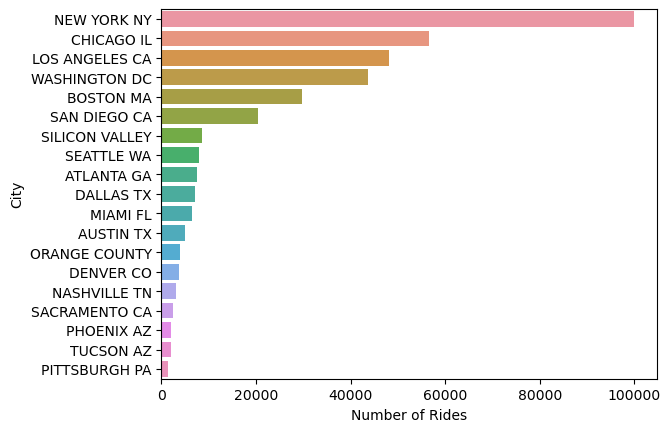

In [25]:
ride_count = sns.countplot(y='City', data=cabs, orient='h', order=cabs['City'].value_counts(ascending=False).index)
ride_count.set(xlabel='Number of Rides', ylabel='City')

In [26]:
mean_cost_order = cabs.groupby('City')['Cost of Trip'].mean().sort_values(ascending=False).index.values
mean_cost_order

array(['WASHINGTON DC', 'CHICAGO IL', 'NEW YORK NY', 'BOSTON MA',
       'DALLAS TX', 'ATLANTA GA', 'MIAMI FL', 'SEATTLE WA',
       'LOS ANGELES CA', 'DENVER CO', 'SILICON VALLEY', 'AUSTIN TX',
       'ORANGE COUNTY', 'TUCSON AZ', 'PHOENIX AZ', 'SACRAMENTO CA',
       'PITTSBURGH PA', 'SAN DIEGO CA', 'NASHVILLE TN'], dtype=object)

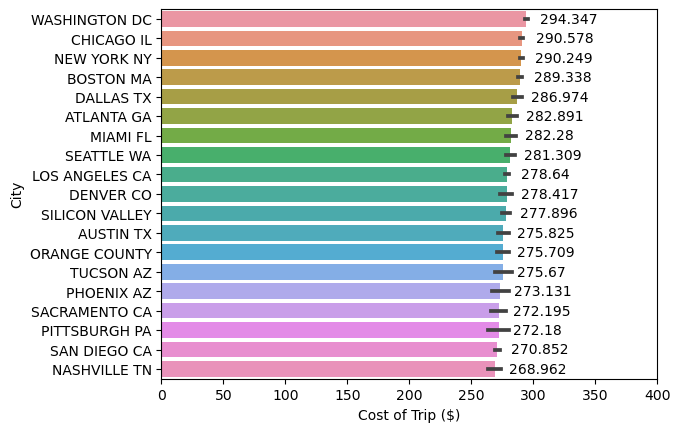

In [27]:
mean_cost_per_city = sns.barplot(
    x='Cost of Trip', 
    y='City', 
    data=cabs,
    order=mean_cost_order)

mean_cost_per_city.set(xlabel='Cost of Trip ($)', ylabel='City', xlim=(0, 400))

for i in mean_cost_per_city.containers:
    mean_cost_per_city.bar_label(i, padding=10)

In [28]:
sum_cost_order = cabs.groupby('City')['Cost of Trip'].sum().sort_values(ascending=False).index.values
sum_cost_order

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'WASHINGTON DC',
       'BOSTON MA', 'SAN DIEGO CA', 'SILICON VALLEY', 'SEATTLE WA',
       'ATLANTA GA', 'DALLAS TX', 'MIAMI FL', 'AUSTIN TX',
       'ORANGE COUNTY', 'DENVER CO', 'NASHVILLE TN', 'SACRAMENTO CA',
       'PHOENIX AZ', 'TUCSON AZ', 'PITTSBURGH PA'], dtype=object)

[Text(0.5, 0, 'Cost of Trip ($)'), Text(0, 0.5, 'City')]

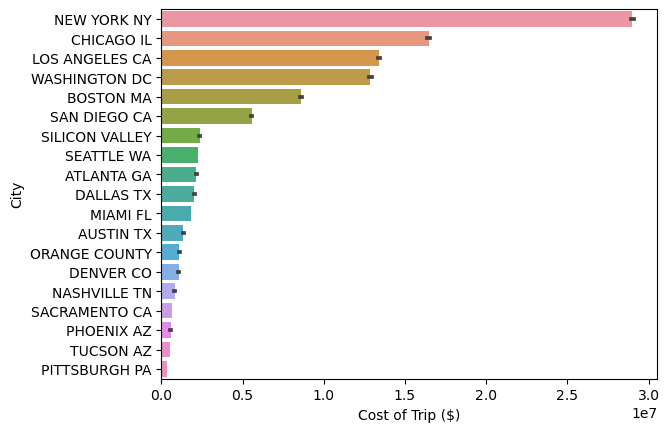

In [29]:
sum_cost_per_city = sns.barplot(
    x='Cost of Trip', 
    y='City', 
    data=cabs,
    estimator='sum',
    order=sum_cost_order)
sum_cost_per_city.set(xlabel='Cost of Trip ($)', ylabel='City')

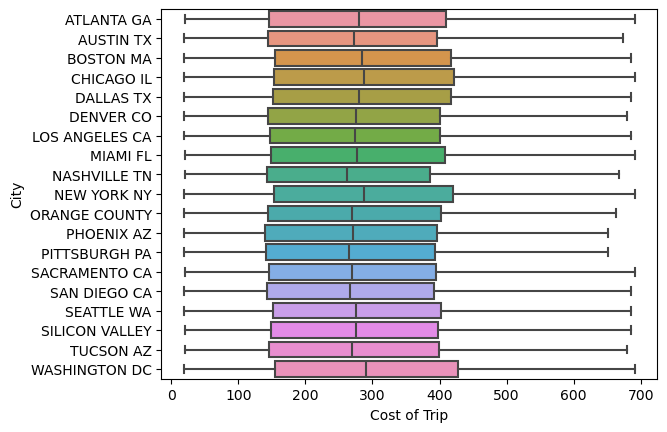

In [30]:
cost_boxplot = sns.boxplot(x='Cost of Trip', y='City', data=cabs)

<div class="alert alert-block alert-success">
<b>Answer:</b> New York generated the most rides and most profit. However, in terms of average and max cost per city, there is not much difference between each cities.
</div>

### Hypothesis 2: Which cab company generated the most rides?

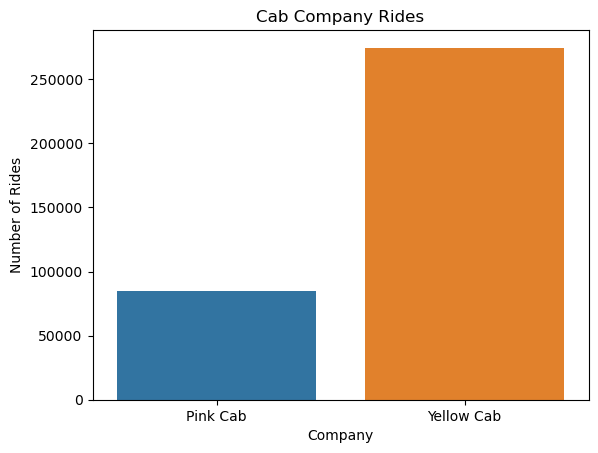

In [63]:
sns.countplot(x='Company', data=cabs).set(ylabel='Number of Rides', title='Cab Company Rides')
plt.savefig('cab_rides.png')

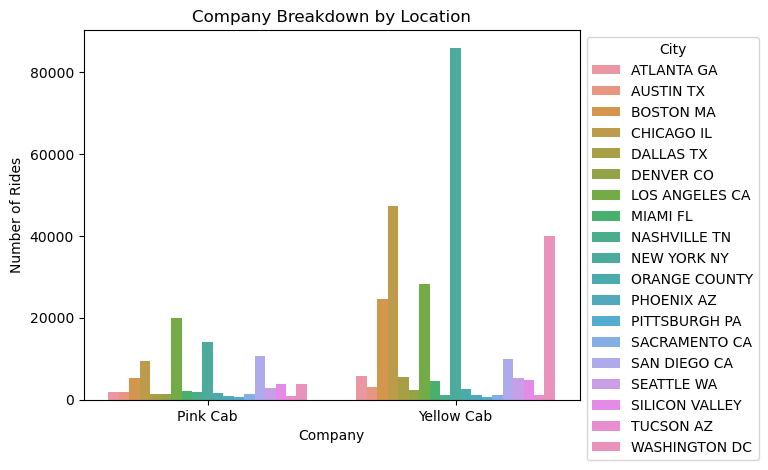

In [66]:
c = sns.countplot(x='Company', data=cabs, hue='City')
sns.move_legend(c, "upper left", bbox_to_anchor=(1, 1))
c.set(ylabel='Number of Rides', title='Company Breakdown by Location')
plt.savefig('cab_company_location.png', bbox_inches='tight')

<div class="alert alert-block alert-success">
<b>Answer:</b> Yellow Cab generated more rides compared to Pink Cab.
</div>

### Hypothesis 3: Which cities has the highest user-to-population ratio?

In [33]:
pd.merge(left=cabs, right=cities, on='City')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001


In [34]:
cities

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [35]:
a = cabs.groupby('City')['Transaction ID'].count()

In [36]:
b = cities[['City', 'Users']].sort_values('City')

In [37]:
rides_vs_users = pd.merge(left=a.rename('Number of Rides'), right=b, on='City')

In [38]:
rides_vs_users['Rides/Users'] = round(rides_vs_users['Number of Rides'] / rides_vs_users['Users'], 2)
rides_vs_users

,City,Number of Rides,Users,Rides/Users
0,ATLANTA GA,7557,24701,0.31
1,AUSTIN TX,4896,14978,0.33
2,BOSTON MA,29692,80021,0.37
3,CHICAGO IL,56625,164468,0.34
4,DALLAS TX,7017,22157,0.32
5,DENVER CO,3825,12421,0.31
6,LOS ANGELES CA,48033,144132,0.33
7,MIAMI FL,6454,17675,0.37
8,NASHVILLE TN,3010,9270,0.32
9,NEW YORK NY,99885,302149,0.33


In [39]:
rides_vs_users['Users/Pop (%)'] = round((cities.Users/cities.Population) * 100, 2) 

In [40]:
rides_vs_users.sort_values(by='Users/Pop (%)', ascending=False)

,City,Number of Rides,Users,Rides/Users,Users/Pop (%)
14,SAN DIEGO CA,20488,69995,0.29,33.93
17,TUCSON AZ,1931,5712,0.34,30.32
2,BOSTON MA,29692,80021,0.37,9.04
1,AUSTIN TX,4896,14978,0.33,8.41
6,LOS ANGELES CA,48033,144132,0.33,7.30
12,PITTSBURGH PA,1313,3643,0.36,3.73
0,ATLANTA GA,7557,24701,0.31,3.59
9,NEW YORK NY,99885,302149,0.33,3.03
18,WASHINGTON DC,43737,127001,0.34,2.83
8,NASHVILLE TN,3010,9270,0.32,2.35


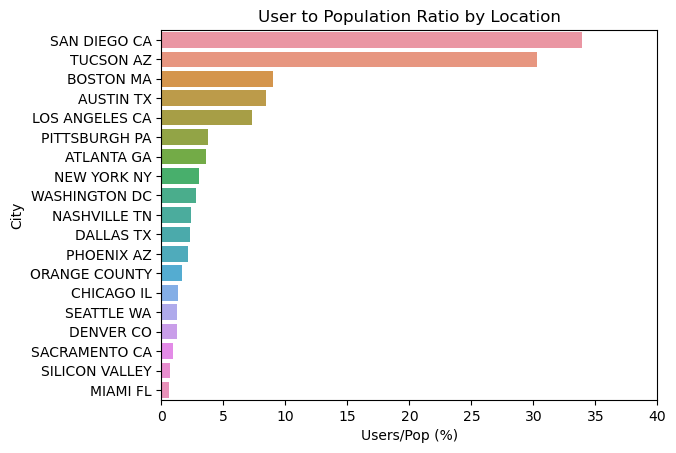

In [67]:
user_to_pop = sns.barplot(
    y='City', 
    x='Users/Pop (%)', 
    data=rides_vs_users, 
    order=rides_vs_users.sort_values('Users/Pop (%)', ascending=False).City, 
    orient = 'h')
user_to_pop.set(xlim=(0, 40), title='User to Population Ratio by Location')
plt.savefig('user_to_population.png', bbox_inches='tight')

<div class="alert alert-block alert-success">
<b>Answer:</b> The top 3 cities with the highest user-to-population ratio are:
    <ol>
        <li> San Diego, CA (33.93%)
        <li> Tucson, AZ (30.32%)
        <li> Boston, MA (9.04%)
    </ol>
</div>

### Hypothesis 4: Does gender impact getting a ride?

In [42]:
demographic.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [43]:
demographic.groupby('Gender')['Income (USD/Month)'].mean()

Gender
Female    15143.081668
Male      15055.786708
Name: Income (USD/Month), dtype: float64

In [44]:
count_by_gender = demographic.groupby('Gender')['Transaction ID'].count()

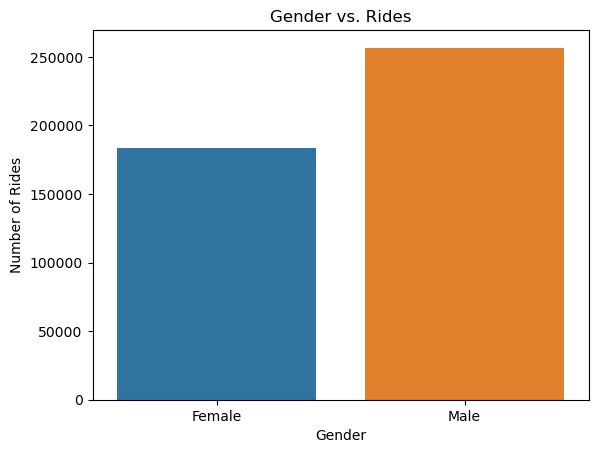

In [68]:
sns.barplot(x=count_by_gender.index, y=count_by_gender.values).set(xlabel='Gender', ylabel='Number of Rides', title='Gender vs. Rides')
plt.savefig('gender_vs_rides', bbox_inches='tight')

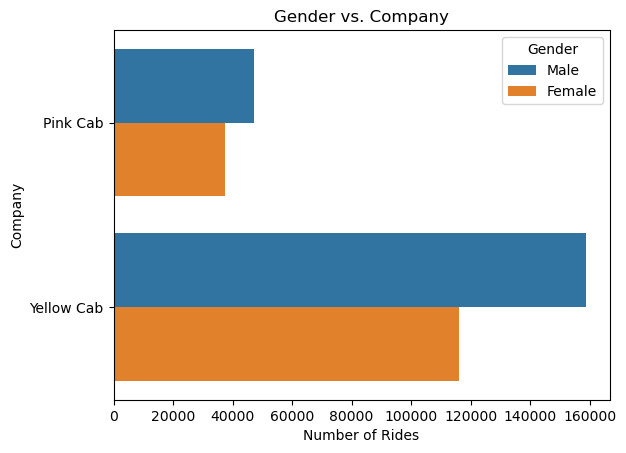

In [59]:
sns.countplot(
    y='Company', 
    data=masterdata, 
    hue='Gender', 
    orient='h').set(
    xlabel='Number of Rides', 
    title='Gender vs. Company')
plt.savefig('gender_vs_company.png')

<div class="alert alert-block alert-success">
<b>Answer:</b> Males tend to use cab services more than females, even though females have a higher average salary.
</div>

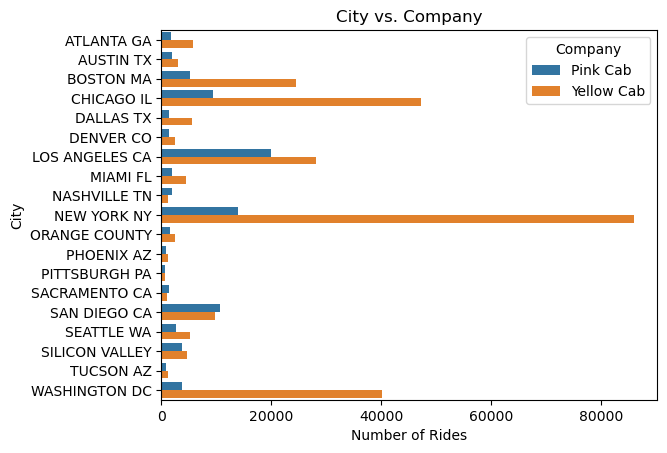

In [65]:
sns.countplot(
    y='City',
    data=masterdata,
    hue='Company',
    orient='h').set(
    xlabel='Number of Rides', 
    title='City vs. Company')
plt.savefig('city_vs_company.png', bbox_inches='tight')

### Hypothesis 5: Does income matter?

/Users/paul/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, 'Number of Rides'), Text(0.5, 1.0, 'Income vs. Rides')]

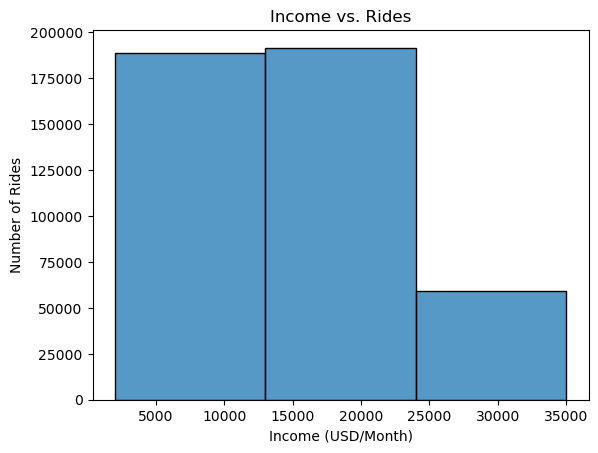

In [47]:
sns.histplot(demographic['Income (USD/Month)'], bins=3).set(ylabel='Number of Rides', title='Income vs. Rides')

<div class="alert alert-block alert-success">
<b>Answer:</b> Higher income individuals with salaries of over \$250,000/month tend to not use cab services compared to individuals who earn less than them. 
</div>